In [1]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import joblib


In [2]:

# Load the dataset
data = pd.read_csv('C:/Users/sai27/Documents/DataScience/Projects/Industrial Copper/Copper_Set.csv')


In [3]:

data.head(5)


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:

data.columns


Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [5]:

# Dealing with data in the wrong format; for categorical variables, this step is ignored
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y%m%d', errors='coerce').dt.date
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce')
data['customer'] = pd.to_numeric(data['customer'], errors='coerce')
data['country'] = pd.to_numeric(data['country'], errors='coerce')
data['application'] = pd.to_numeric(data['application'], errors='coerce')
data['thickness'] = pd.to_numeric(data['thickness'], errors='coerce')
data['width'] = pd.to_numeric(data['width'], errors='coerce')
data['material_ref'] = data['material_ref'].str.lstrip('0')
data['product_ref'] = pd.to_numeric(data['product_ref'], errors='coerce')
data['delivery date'] = pd.to_datetime(data['delivery date'], format='%Y%m%d', errors='coerce').dt.date
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce')


In [6]:

data.sample(5)


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
50094,B9242749-9A21-4078-A679-0B0BFBBE3519,2021-01-28,13.753025,30161088.0,78.0,Won,W,10.0,0.7,1250.0,NaN,164141591,2021-04-01,968.0
142437,0E029A0E-4356-4C3C-810A-926C93AA28BB,2020-09-17,120.454694,30336279.0,78.0,Won,S,59.0,2.0,1500.0,S235JR+AR-CL1,640665,2020-10-01,511.0
124967,3DE6C89A-CE3B-4E4F-8C8A-830191B51BEE,2020-10-13,82.985853,30162161.0,77.0,Won,S,4.0,0.6,1650.0,HX220BD+Z100 MB,164141591,2021-01-01,751.0
8642,5E5C67F4-157E-4202-890F-2297AB5B4952,2021-03-22,10.187346,30165529.0,78.0,Won,W,10.0,1.8,1250.0,NaN,164141591,2021-07-01,1003.0
47651,7E94C00E-E58C-47F6-A1A9-B390C2B47AEF,2021-02-01,6.586318,30157111.0,78.0,To be approved,W,41.0,0.5,1246.0,E4478,611993,2021-04-01,1177.0


In [7]:

data.describe()


,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


<Axes: xlabel='width'>

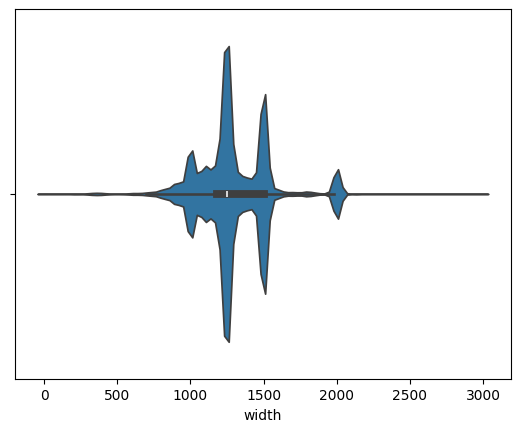

In [8]:

sns.violinplot(x=data["width"])


<Axes: xlabel='application'>

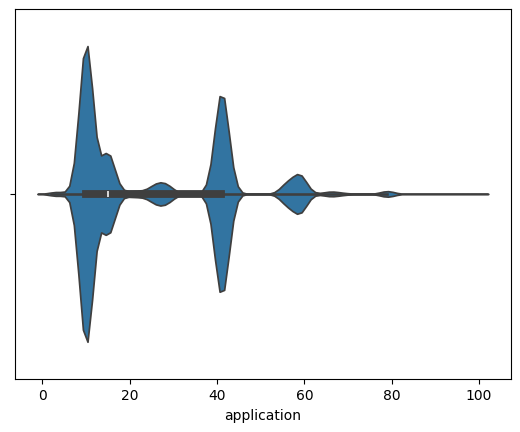

In [9]:

sns.violinplot(x=data["application"])


<Axes: xlabel='country'>

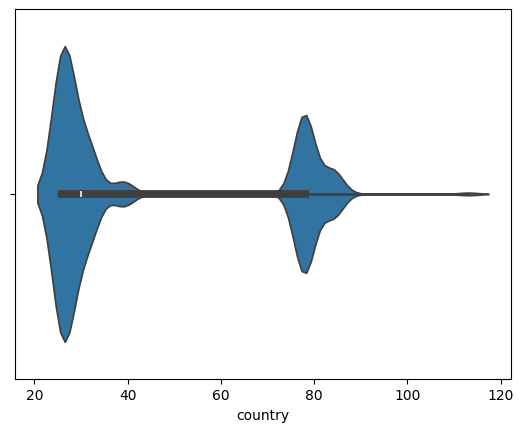

In [10]:

sns.violinplot(x=data["country"])


In [11]:

# EDA

data.isnull().sum()


id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [12]:

# material_code has a large set of null values, so replacing them with 'unknown' because if we remove them, it spoils our data.
data['material_ref'].fillna('unknown', inplace=True)


In [13]:

# Deleting null values
data = data.dropna()


<Axes: >

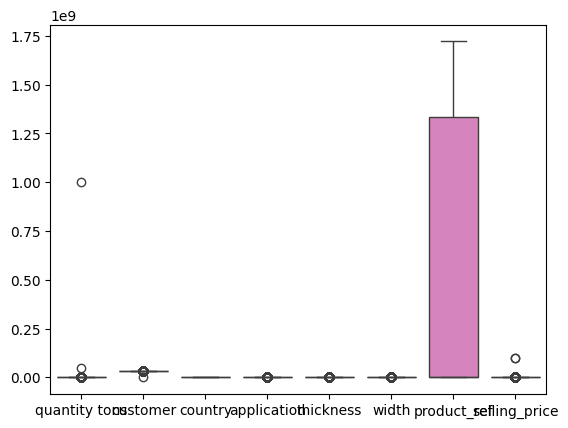

In [14]:

# Draw boxplot
sns.boxplot(data = data)


In [15]:

data_copy = data.copy()


In [16]:

condition = data_copy['selling_price'] <= 0
print(condition.sum())
data_copy.loc[condition, 'selling_price'] = np.nan

condition = data_copy['quantity tons'] <= 0
print(condition.sum())
data_copy.loc[condition, 'quantity tons'] = np.nan

condition = data_copy['thickness'] <= 0
print(condition.sum())


7
4
0


In [17]:

data_copy.isnull().sum()


id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

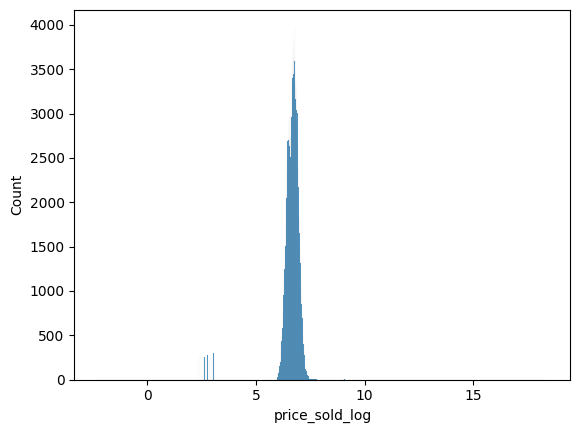

In [18]:

data_copy['price_sold_log'] = np.log(data_copy['selling_price'])
sns.histplot(data_copy['price_sold_log'])
plt.show()


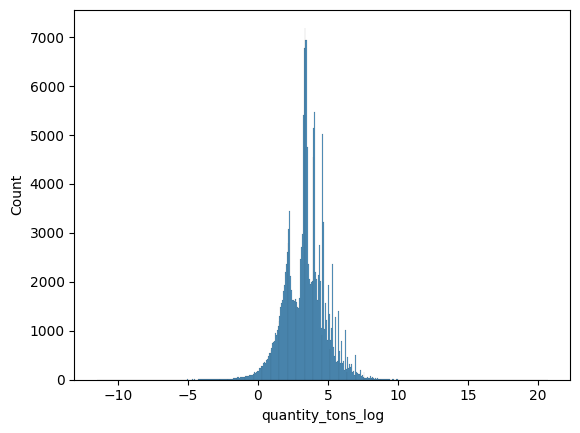

In [19]:

data_copy['quantity_tons_log'] = np.log(data_copy['quantity tons'])
sns.histplot(data_copy['quantity_tons_log'])
plt.show()


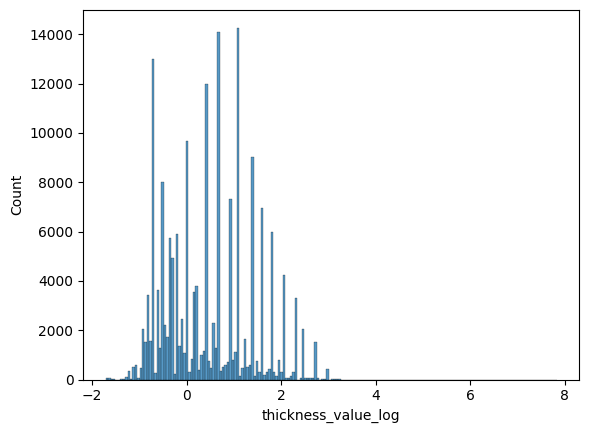

In [20]:

data_copy['thickness_value_log'] = np.log(data_copy['thickness'])
sns.histplot(data_copy['thickness_value_log'])
plt.show()


In [23]:

# Use ordinal encoder to convert categorical data into numerical data
from sklearn.preprocessing import OrdinalEncoder
# Separate encoders for 'status' and 'item type' with specified categories
status_encoder = OrdinalEncoder(categories=[['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered', 'Offerable']])
item_type_encoder = OrdinalEncoder(categories=[['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']])

# Fit and transform the 'status' column
data_copy['status'] = status_encoder.fit_transform(data_copy[['status']])

# Fit and transform the 'item type' column
data_copy['item type'] = item_type_encoder.fit_transform(data_copy[['item type']])


In [24]:

# Save the encoders separately
joblib.dump(status_encoder, 'status_encoder.pkl')
joblib.dump(item_type_encoder, 'item_category_encoder.pkl')


['item_category_encoder.pkl']

In [25]:
data_copy = data_copy.dropna()

In [26]:

# REGRESSION

# Split data into X, y
X = data_copy[['quantity_tons_log', 'status', 'item type', 'application', 'thickness_value_log', 'width', 'country', 'customer', 'product_ref']]
y = data_copy['price_sold_log']


In [27]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [28]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(127134, 9)
(54486, 9)
(127134,)
(54486,)


In [29]:

# Import regression algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [41]:

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))

joblib.dump(linear_reg, 'linear_regression_model.pkl')


0.08464529095644646
0.07805457009399042


['linear_regression_model.pkl']

In [42]:

rf_regressor = RandomForestRegressor(n_estimators=20, max_depth=4, random_state=42)
rf_regressor.fit(X_train, y_train)
print(rf_regressor.score(X_train, y_train))
print(rf_regressor.score(X_test, y_test))

joblib.dump(rf_regressor, 'random_forest_regressor_model.pkl')


0.8736436626286413
0.8867180545575358


['random_forest_regressor_model.pkl']

In [43]:

gbr_regressor = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1, random_state=42)
gbr_regressor.fit(X_train, y_train)
print(gbr_regressor.score(X_train, y_train))
print(gbr_regressor.score(X_test, y_test))

joblib.dump(gbr_regressor, 'gradient_boosting_regressor_model.pkl')


0.7627437653996635
0.7738696934709421


['gradient_boosting_regressor_model.pkl']

In [44]:

decision_tree = DecisionTreeRegressor()
# Hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

joblib.dump(best_model, 'best_decision_tree_regressor_model.pkl')


Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}


['best_decision_tree_regressor_model.pkl']

In [45]:

# Check metrics
from sklearn import metrics

# Check MSE
metrics.mean_squared_error(y_test, y_pred)

# Check MAE
metrics.mean_absolute_error(y_test, y_pred)

# R2 Score
print(metrics.r2_score(y_test, y_pred))


0.9128652751800768


In [46]:

# CLASSIFICATION

data.status.value_counts()


status
Won                116004
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4167
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [47]:

data_class = data.copy()


In [48]:

data_class = data[data['status'].isin(['Won', 'Lost'])]
len(data_class)


150435

In [49]:

data_class.status.value_counts()


status
Won     116004
Lost     34431
Name: count, dtype: int64

In [50]:

# Use ordinal encoder to convert categorical data into numerical data
encoder = OrdinalEncoder()
data_class.status = encoder.fit_transform(data_class[['status']])
data_class['item type'] = encoder.fit_transform(data_class[['item type']])

# Apply standard scaler
scaler.fit_transform(X)

# Save the scaler and encoder
joblib.dump(scaler, 'classification_scaler.pkl')
joblib.dump(encoder, 'classification_ordinal_encoder.pkl')

['classification_ordinal_encoder.pkl']

In [51]:

# Split data into X, y
X = data_class[['quantity tons', 'selling_price', 'item type', 'application', 'thickness', 'width', 'country', 'customer', 'product_ref']]
y = data_class['status']


In [52]:

# Split data into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(105304, 9)
(45131, 9)
(105304,)
(45131,)


In [53]:

# Import classifier algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [54]:

dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=1)
dt_classifier.fit(X_train, y_train)
joblib.dump(dt_classifier, 'decision_tree_classifier_model.pkl')
train_score = dt_classifier.score(X_train, y_train)
test_score = dt_classifier.score(X_test, y_test)
print(train_score)
print(test_score)


0.8093139861733647
0.8112827103321442


In [55]:

knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(X_train, y_train)
joblib.dump(knn_classifier, 'knn_classifier_model.pkl')
print(knn_classifier.score(X_train, y_train))
print(knn_classifier.score(X_test, y_test))


0.9220352503228747
0.8905851853493164


In [56]:

gbc_classifier = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, random_state=28)
gbc_classifier.fit(X_train, y_train)
joblib.dump(gbc_classifier, 'gradient_boosting_classifier_model.pkl')
print(gbc_classifier.score(X_train, y_train))
print(gbc_classifier.score(X_test, y_test))


0.8192091468510218
0.8206554253174093


In [57]:

rf_classifier = RandomForestClassifier(n_estimators=20, max_depth=6, random_state=35)
rf_classifier.fit(X_train, y_train)
joblib.dump(rf_classifier, 'random_forest_classifier_model.pkl')
print(rf_classifier.score(X_train, y_train))
print(rf_classifier.score(X_test, y_test))


0.8212983362455367
0.821940572998604


In [58]:

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
joblib.dump(log_reg, 'logistic_regression_model.pkl')
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))


0.7716895844412368
0.7698034610356518


In [59]:

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)
print(xgb_model.score(X_train, y_train))
print(xgb_model.score(X_test, y_test))


0.616447136044171
0.5731833689096041


In [60]:

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [61]:

# Model initialization and training
forest_classifier = ExtraTreesClassifier(n_estimators=20, random_state=0)
forest_classifier.fit(X_train, y_train)

# Save the model
joblib.dump(forest_classifier, 'forest_classifier_model.pkl')


['forest_classifier_model.pkl']

In [62]:

# Model evaluation on training data
print(forest_classifier.score(X_train, y_train))

# Model evaluation on test data
print(forest_classifier.score(X_test, y_test))

# Predictions using KNN model
predicted_labels = knn_classifier.predict(X_test)


1.0
0.9309565487137444


In [63]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)


Text(58.222222222222214, 0.5, 'Actual Labels')

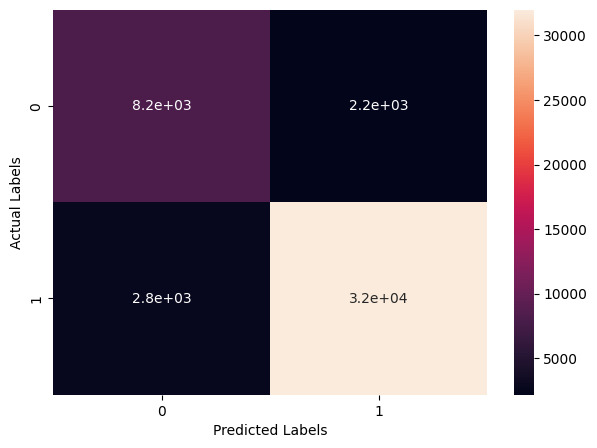

In [64]:

# Plot confusion matrix heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')


In [65]:

# Calculate accuracy score
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8905851853493164


In [66]:

# Calculate F1 score
f1 = f1_score(y_test, predicted_labels, average='macro')
print(f"F1 Score: {f1}")


F1 Score: 0.8485570397412172


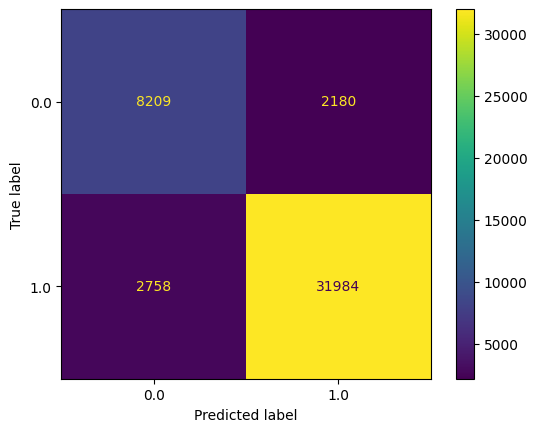

In [67]:

# Display confusion matrix using built-in function
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn_classifier.classes_)
conf_matrix_display.plot()
plt.show()


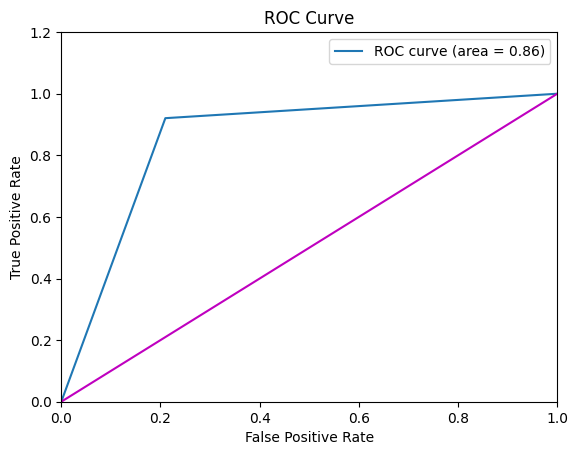

In [68]:

# ROC Curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted_labels)
roc_auc_value = auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % roc_auc_value)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [69]:

# Classification report
print(classification_report(y_test, predicted_labels))


              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77     10389
         1.0       0.94      0.92      0.93     34742

    accuracy                           0.89     45131
   macro avg       0.84      0.86      0.85     45131
weighted avg       0.89      0.89      0.89     45131

